In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zigzag import *

In [23]:
data_folder = 'csv_data/'

file_path = data_folder + 'AAPL_stock_data.csv'
df = pd.read_csv(file_path)

X = df['Close']

pivots = peak_valley_pivots(X, 0.02, -0.02)
print(pivots)
df = df.assign(Pivot=pivots)


[-1  0  0 ...  0  0 -1]


In [24]:
def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

The following plot illustrates how the sequence was annotated. 

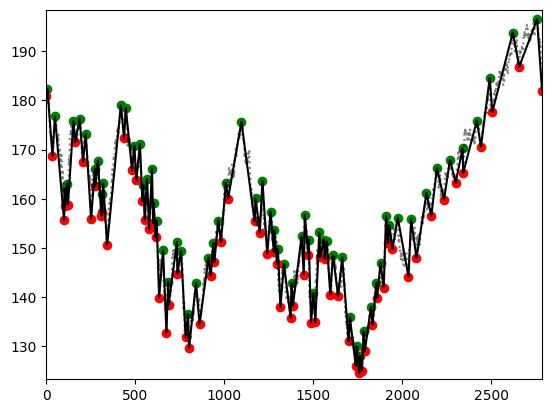

In [25]:
plot_pivots(X, pivots)

The following shows how you can use `pivots_to_modes` to inspect the segments.

In [26]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe()

,count,mean,std,min,25%,50%,75%,max
-1,1227.0,-0.002915,0.006783,-0.042459,-0.005481,-0.001843,0.000794,0.018170
1,1557.0,0.002347,0.006606,-0.018815,-0.001070,0.001566,0.004609,0.066207


Calculate the peak to valley returns for all of the segments.

In [27]:
compute_segment_returns(X, pivots)

array([ 0.00779697, -0.07418384,  0.04759082, -0.11942748,  0.04163194,
       -0.02189603,  0.02837684, -0.02636745,  0.1073813 , -0.02434169,
        0.02757211, -0.04980712,  0.03367164, -0.09986135,  0.06608725,
       -0.02167927,  0.03212783, -0.06693694,  0.02842732, -0.02298287,
        0.03754221, -0.07693255,  0.18819707, -0.03718084,  0.03557019,
       -0.07107835,  0.03028112, -0.0412752 ,  0.04543386, -0.06758577,
        0.02023563, -0.04378265,  0.0535255 , -0.06238753,  0.07996351,
       -0.06645794,  0.02643791, -0.04416383,  0.02224785, -0.10026683,
        0.06838639, -0.11164931,  0.07779624, -0.03304223,  0.09254441,
       -0.04278253,  0.03177752, -0.11703328,  0.03570739, -0.0501804 ,
        0.10128338, -0.0586527 ,  0.10078448, -0.02485652,  0.0459237 ,
       -0.02562911,  0.05743218, -0.02770277,  0.07949953, -0.0202448 ,
        0.09797479, -0.11524089,  0.03010402, -0.04341101,  0.06836699,
       -0.09077415,  0.05795738, -0.05190926,  0.02926749, -0.04

Finally, compute the oft-quoted (in financial literature) `max_drawdown`.

In [28]:
max_drawdown(X)

0.3164883418665338

Pandas Compatability
---
The `peak_valley_pivots` function works on pandas `series` assuming the index is either a DateTimeIndex or is \[0, n). [Pandas](http://pandas.pydata.org/) is great.

In [29]:
from pandas_datareader import get_data_yahoo

X = get_data_yahoo('META')['Adj Close']
pivots = peak_valley_pivots(X.values, 0.2, -0.2)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
X.plot()
ts_pivots.plot(style='g-o');

TypeError: string indices must be integers, not 'str'

# `#WONTFIX`

[in PR#13 `ytian` writes](https://github.com/jbn/ZigZag/pull/13),

> the code has some bugs for some test cases:
> code:
>
> a = np.array([1, 1.2, 1.5, 1.8, 2.4, 3.3, 2.4, 1.5, 1.6])  
> peak_valley_pivots(a, 0.2, -0.2) 
> 
> output (wrong result)  
> array([-1, 0, 0, 0, 0, 1, 0, 0, 1]) 
> 
> output (after fix)  
> array([-1, 0, 0, 0, 0, 1, 0, -1, 1])


Visually,

In [ ]:
X = np.array([1, 1.2, 1.5, 1.8, 2.4, 3.3, 2.4, 1.5, 1.6])
pivots = peak_valley_pivots(X, 0.2, -0.2)
plot_pivots(X, pivots)

Intuitively, what he is saying seems to make sense. 

- 3.3 is the peak
- 1.5 is the lowest point after it
- 1.6 is above 1.5 so can't be the valley pivot

The difficulty here is that 1.6 is not a peak, either. A local one, yes, but not according to the segmenter which requires `>20%` which 1.6 above 1.5 does not satisfy.